In [ ]:
#Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Lendo o dataset de vendas online
df = pd.read_csv(
    "../data/onlineretail.csv",
    encoding="ISO-8859-1"
)

# Criando uma cópia para não alterar o dataset original
df_clean = df.copy()

# Criando uma cópia para não alterar o dataset original
df_clean = df_clean.dropna(subset=["CustomerID"])

# Criando uma cópia para não alterar o dataset original
df_clean["CustomerID"].isna().sum()

# Criando uma cópia para não alterar o dataset original
df_clean["InvoiceDate"] = pd.to_datetime(df_clean["InvoiceDate"])

# Convertendo CustomerID para inteiro
df_clean["CustomerID"] = df_clean["CustomerID"].astype(int)







In [40]:
# Verificando a menor quantidade vendida
df_clean["Quantity"].min()

# Removendo linhas com quantidade menor ou igual a zero
df_clean = df_clean[df_clean["Quantity"] > 0]

In [ ]:
# Criando a coluna de faturamento por item
df_clean["TotalPrice"] = df_clean["Quantity"] * df_clean["UnitPrice"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
#Conferindo se os tipos de dados estão corretos
df_clean.dtypes


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [ ]:
# Análises!
# Faturamento total da empresa
faturamento_total = df_clean["TotalPrice"].sum()
print(f"Faturamento total: £ {faturamento_total:,.2f}")

Faturamento total: £ 8,300,065.81


In [ ]:
# Faturamento por país
faturamento_por_pais = (
    df_clean.groupby("Country")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
)

faturamento_por_pais.head(10)

Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
France             196712.840
Australia          137077.270
Switzerland         55739.400
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: TotalPrice, dtype: float64

In [ ]:
# Quantidade de pedidos por país
pedidos_pais = (
    df_clean
    .groupby("Country")
    .size()
    .sort_values(ascending=False)
)

pedidos_pais.head(10)


Country
United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         1877
Portugal            1480
Australia           1259
dtype: int64

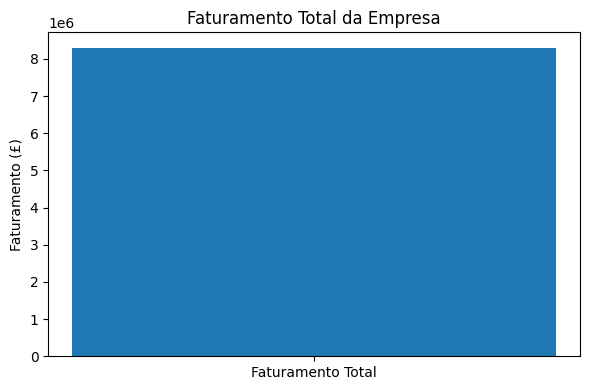

In [42]:
#Importação de Gráficos

plt.figure(figsize=(6, 4))
plt.bar(["Faturamento Total"], [faturamento_total])
plt.title("Faturamento Total da Empresa")
plt.ylabel("Faturamento (£)")
plt.tight_layout()
plt.show()

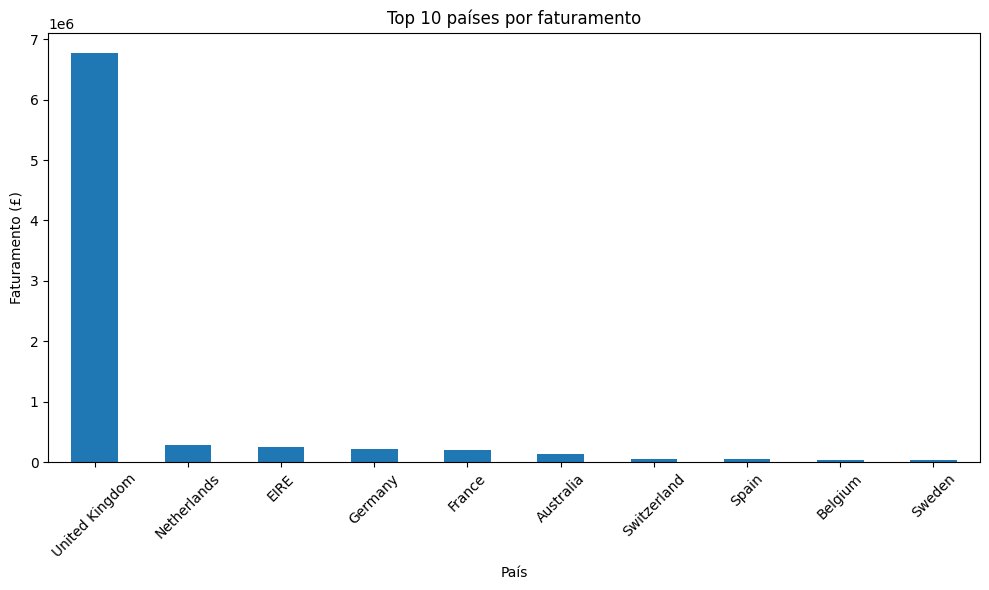

In [47]:
top10_faturamento = faturamento_por_pais.head(10)

plt.figure(figsize=(10, 6))
top10_faturamento.plot(kind="bar")
plt.title("Top 10 países por faturamento")
plt.xlabel("País")
plt.ylabel("Faturamento (£)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

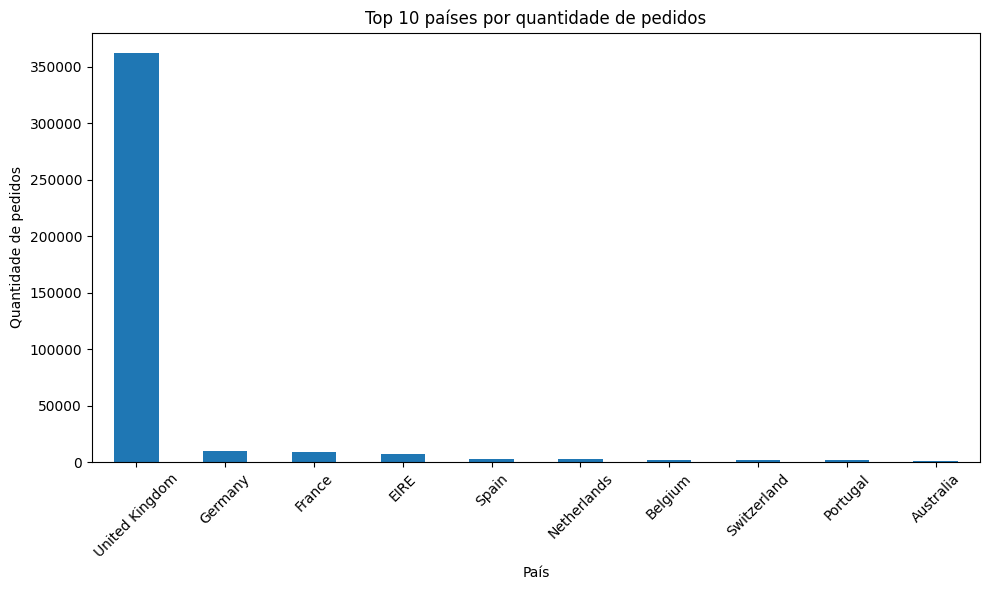

In [50]:
top10_pedidos = pedidos_pais.head(10)

plt.figure(figsize=(10, 6))
top10_pedidos.plot(kind="bar")
plt.title("Top 10 países por quantidade de pedidos")
plt.xlabel("País")
plt.ylabel("Quantidade de pedidos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
plt.savefig("../images/pedidos_por_pais.png")


<Figure size 640x480 with 0 Axes>